In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestRegressor

In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('../bin/data.csv')

df.head(10)

,provincia,marca_modelo,fecha_matriculacion,kilometraje,nombre_vendedor,tipo_vendedor,distintivo_ambiental,garantia,precio_contado,precio_nuevo,largo,ancho,alto,capacidad_maletero,carroceria,num_plazas,batalla,peso,num_puertas,consumo_medio,consumo_carretera,consumo_urbano,CO2,deposito,combustible,cilindros,cilindrada,sobrealimentacion,tipo_cambio,traccion,num_marchas,potencia_kw,potencia_cv,par,velocidad_max,aceleracion
0,Vizcaya,Detalles PORSCHE 911 (2020),Matriculado: 05/2020,21500,CENTRO PORSCHE BILBAO,Profesional,C,12 meses,135100 135700 0%,158158,4519 mm Largo,1852 mm Ancho,1297 mm Alto,Capacidad del maletero (l)132/0,CarroceríaConvertible,Número de plazas4,Batalla (mm)\n2.450,Peso/Masa max. autorizado (kg)2.015,Número de puertas2,"Consumo medio 9,60 litros/100 km","Consumo en carretera 7,60 litros/100 km","Consumo urbano 12,90 litros/100 km",CO2 (g/km) 218 g/km,"Depósito de combustible (l) 64,00 litros",Combustible Gasolina,Nº de cilindros 6 cilindros,Cilindrada (cm3) 2.981,Sobrealimentación Doble turbo,Tipo de transmisión Automática secuencial,TracciónTracción trasera,Número de marchas8,Potencia (KW)283,Potencia (CV)385,Par (Nm)450,Velocidad máxima (km/h)291,"Aceleración 0-100 km/h (s)4,40"
1,Vizcaya,Detalles PORSCHE Panamera (2024),Matriculado: 06/2024,10000,CENTRO PORSCHE BILBAO,Profesional,0 EMISIONES,24 meses,205700,204516,5054 mm Largo,1937 mm Ancho,1421 mm Alto,Capacidad del maletero (l)421/1.255,CarroceríaBerlina,Número de plazas4,Batalla (mm)\n2.950,Peso/Masa max. autorizado (kg)2.830,Número de puertas5,"Consumo medio 2,10 litros/100 km",Consumo en carreteralitros/100 km,Consumo urbanolitros/100 km,CO2 (g/km) 47 g/km,"Depósito de combustible (l) 80,00 litros",Combustible Gasolina y corriente eléctrica,Nº de cilindros 8 cilindros,Cilindrada (cm3) 3.996,Sobrealimentación Turbo de geometría variable,Tipo de transmisión Automática secuencial,TracciónTracción total permanente,Número de marchas8,Potencia (KW)500,Potencia (CV)680,Par (Nm)930,Velocidad máxima (km/h)315,"Aceleración 0-100 km/h (s)3,20"
2,Sevilla,Detalles DACIA Sandero (2017),Matriculado: 12/2017,124000,DURMOVIL,Profesional,C,12 meses,9499,9696,4069 mm Largo,1733 mm Ancho,1519 mm Alto,Capacidad del maletero (l)320/0,CarroceríaBerlina,Número de plazas5,Batalla (mm)\n2.589,Peso/Masa max. autorizado (kg)1.652,Número de puertas5,"Consumo medio 3,50 litros/100 km","Consumo en carretera 3,40 litros/100 km","Consumo urbano 3,70 litros/100 km",CO2 (g/km) 90 g/km,"Depósito de combustible (l) 50,00 litros",Combustible Diesel,Nº de cilindros 4 cilindros,Cilindrada (cm3) 1.461,Sobrealimentación Turbo,Tipo de transmisión Manual,TracciónTracción delantera,Número de marchas5,Potencia (KW)55,Potencia (CV)75,Par (Nm)200,Velocidad máxima (km/h)164,"Aceleración 0-100 km/h (s)14,60"
3,Barcelona,Detalles VOLKSWAGEN T-Roc (2024),Matriculado: 01/2024,10,Volkswagen Vilamòbil,Profesional,C,24 meses,33900,no disponible,NaN,NaN,NaN,NaN,"4x4, SUV o pickup",NaN,NaN,NaN,5 Puertas,NaN,NaN,NaN,NaN,NaN,Gasolina,NaN,NaN,NaN,Automático,NaN,NaN,NaN,150,NaN,NaN,NaN
4,Málaga,Detalles CITROEN C3 (2020),Matriculado: 10/2020,60000,MARBESOL,Profesional,C,12 meses,11190,15700,3996 mm Largo,1749 mm Ancho,1474 mm Alto,Capacidad del maletero (l)300/0,CarroceríaBerlina,Número de plazas5,Batalla (mm)\n2.539,Peso/Masa max. autorizado (kg)1.550,Número de puertas5,"Consumo medio 4,70 litros/100 km","Consumo en carretera 4,10 litros/100 km","Consumo urbano 5,70 litros/100 km",CO2 (g/km) 96 g/km,"Depósito de combustible (l) 45,00 litros",Combustible Gasolina,Nº de cilindros 3 cilindros,Cilindrada (cm3) 1.199,Sobrealimentación Turbo,Tipo de transmisión Manual,TracciónTracción delantera,Número de marchas5,Potencia (KW)60,Potencia (CV)82,Par (Nm)118,Velocidad máxima (km/h)168,"Aceleración 0-100 km/h (s)13,00"
5,Pontevedra,Detalles SKODA Kamiq (2023),Matriculado: 05/2023,23161,SUZUKI SKODA MOURENTE Pontevedra,Profesional,C,Sí,19990,26783,4241 mm Largo,1793 mm Ancho,1553 mm Alto,Capacidad del maletero (l)400/1.

In [3]:
df.columns

Index(['provincia', 'marca_modelo', 'fecha_matriculacion', 'kilometraje',
       'nombre_vendedor', 'tipo_vendedor', 'distintivo_ambiental', 'garantia',
       'precio_contado', 'precio_nuevo', 'largo', 'ancho', 'alto',
       'capacidad_maletero', 'carroceria', 'num_plazas', 'batalla', 'peso',
       'num_puertas', 'consumo_medio', 'consumo_carretera', 'consumo_urbano',
       'CO2', 'deposito', 'combustible', 'cilindros', 'cilindrada',
       'sobrealimentacion', 'tipo_cambio', 'traccion', 'num_marchas',
       'potencia_kw', 'potencia_cv', 'par', 'velocidad_max', 'aceleracion'],
      dtype='object')

In [4]:
df['kilometraje'].dtype == 'int64'

True

In [5]:
df.shape

(80, 36)

In [6]:
nan_percentage = df.isna().mean()*100
print(nan_percentage)

provincia                0.00
marca_modelo             0.00
fecha_matriculacion      0.00
kilometraje              0.00
nombre_vendedor          0.00
tipo_vendedor            0.00
distintivo_ambiental     0.00
garantia                 0.00
precio_contado           0.00
precio_nuevo             0.00
largo                   20.00
ancho                   20.00
alto                    20.00
capacidad_maletero      20.00
carroceria               0.00
num_plazas              13.75
batalla                 20.00
peso                    12.50
num_puertas              0.00
consumo_medio           13.75
consumo_carretera       15.00
consumo_urbano          15.00
CO2                     21.25
deposito                20.00
combustible              0.00
cilindros               20.00
cilindrada              10.00
sobrealimentacion       20.00
tipo_cambio              0.00
traccion                20.00
num_marchas             16.25
potencia_kw             20.00
potencia_cv              0.00
par       

In [7]:
df = df.dropna(subset=['precio_contado'])

In [8]:
nan_percentage = df.isna().mean()*100
print(nan_percentage)

provincia                0.00
marca_modelo             0.00
fecha_matriculacion      0.00
kilometraje              0.00
nombre_vendedor          0.00
tipo_vendedor            0.00
distintivo_ambiental     0.00
garantia                 0.00
precio_contado           0.00
precio_nuevo             0.00
largo                   20.00
ancho                   20.00
alto                    20.00
capacidad_maletero      20.00
carroceria               0.00
num_plazas              13.75
batalla                 20.00
peso                    12.50
num_puertas              0.00
consumo_medio           13.75
consumo_carretera       15.00
consumo_urbano          15.00
CO2                     21.25
deposito                20.00
combustible              0.00
cilindros               20.00
cilindrada              10.00
sobrealimentacion       20.00
tipo_cambio              0.00
traccion                20.00
num_marchas             16.25
potencia_kw             20.00
potencia_cv              0.00
par       

In [9]:
df.shape

(80, 36)

In [10]:
#df["Fecha_mes"] = np.nan

#df["Fecha_año"] = df['Fecha de matriculación']

#filas_con_mes = df['fecha_matriculacion'].str.contains('/')

#df.loc[filas_con_mes, "Fecha_mes"] = df.loc[filas_con_mes, 'Fecha de matriculación'].str.split('/').str[0].astype("Int64")
#df.loc[filas_con_mes, "Fecha_año"] = df.loc[filas_con_mes, 'Fecha de matriculación'].str.split('/').str[1].astype("Int64")

In [11]:
df['fecha_matriculacion'] = df['fecha_matriculacion'].str.split("Matriculado: ").str[1]

filas_con_mes = df['fecha_matriculacion'].str.contains('/')

df.loc[filas_con_mes, "Fecha_mes"] = df.loc[filas_con_mes, 'fecha_matriculacion'].str.split('/').str[0].astype("Int64")
df.loc[filas_con_mes, "Fecha_año"] = df.loc[filas_con_mes, 'fecha_matriculacion'].str.split('/').str[1].astype("Int64")

In [12]:
df = df.drop(columns=['fecha_matriculacion'])

In [13]:
df['Fecha_año']=df['Fecha_año'].astype('int64')

In [14]:
df['Fecha_mes']=df['Fecha_mes'].astype('int64')

In [15]:
#df["kilometraje"] = df["kilometraje"].str.split(' ').str[0].str.replace(".","")

#df["kilometraje"] = df["kilometraje"].astype(float)

In [16]:
df_profesionales = df[df["tipo_vendedor"] == "Profesional"]

In [17]:
df["garantia"] = df["garantia"].str.split(' ').str[0].replace("Sí",np.nan).replace("No",0).astype(float)

In [18]:
#modelos = 

In [19]:
df["precio_contado"] = pd.to_numeric(df["precio_contado"], errors='coerce')

In [20]:
df["precio_nuevo"] = pd.to_numeric(df["precio_nuevo"], errors='coerce')

In [21]:
df["largo"] = df["largo"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [22]:
df["ancho"] = df["ancho"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [23]:
df["alto"] = df["alto"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [47]:
df["capacidad_maletero"] = df["capacidad_maletero"].str.split(")").str[1].str.split("/").str[0].astype(float)

In [49]:
df["num_plazas"] = df["num_plazas"].str.split("s").str[1].astype(float)

In [63]:
#El split no funciona como debería, no sé cuál es el problema

df["batalla"].str.split("n")[1]

['Batalla (mm)\n2.950']

In [67]:
df["peso"] = df["peso"].str.split(")").str[1].str[0].astype(float)

In [69]:
df.head()

,provincia,marca_modelo,kilometraje,nombre_vendedor,tipo_vendedor,distintivo_ambiental,garantia,precio_contado,precio_nuevo,largo,ancho,alto,capacidad_maletero,carroceria,num_plazas,batalla,peso,num_puertas,consumo_medio,consumo_carretera,consumo_urbano,CO2,deposito,combustible,cilindros,cilindrada,sobrealimentacion,tipo_cambio,traccion,num_marchas,potencia_kw,potencia_cv,par,velocidad_max,aceleracion,Fecha_mes,Fecha_año
0,Vizcaya,Detalles PORSCHE 911 (2020),21500,CENTRO PORSCHE BILBAO,Profesional,C,12.0,NaN,158158.0,4519.0,1852.0,1297.0,132.0,CarroceríaConvertible,4.0,Batalla (mm)\n2.450,2.0,Número de puertas2,"Consumo medio 9,60 litros/100 km","Consumo en carretera 7,60 litros/100 km","Consumo urbano 12,90 litros/100 km",CO2 (g/km) 218 g/km,"Depósito de combustible (l) 64,00 litros",Combustible Gasolina,Nº de cilindros 6 cilindros,Cilindrada (cm3) 2.981,Sobrealimentación Doble turbo,Tipo de transmisión Automática secuencial,TracciónTracción trasera,Número de marchas8,Potencia (KW)283,Potencia (CV)385,Par (Nm)450,Velocidad máxima (km/h)291,"Aceleración 0-100 km/h (s)4,40",5,2020
1,Vizcaya,Detalles PORSCHE Panamera (2024),10000,CENTRO PORSCHE BILBAO,Profesional,0 EMISIONES,24.0,205700.0,204516.0,5054.0,1937.0,1421.0,421.0,CarroceríaBerlina,4.0,Batalla (mm)\n2.950,2.0,Número de puertas5,"Consumo medio 2,10 litros/100 km",Consumo en carreteralitros/100 km,Consumo urbanolitros/100 km,CO2 (g/km) 47 g/km,"Depósito de combustible (l) 80,00 litros",Combustible Gasolina y corriente eléctrica,Nº de cilindros 8 cilindros,Cilindrada (cm3) 3.996,Sobrealimentación Turbo de geometría variable,Tipo de transmisión Automática secuencial,TracciónTracción total permanente,Número de marchas8,Potencia (KW)500,Potencia (CV)680,Par (Nm)930,Velocidad máxima (km/h)315,"Aceleración 0-100 km/h (s)3,20",6,2024
2,Sevilla,Detalles DACIA Sandero (2017),124000,DURMOVIL,Profesional,C,12.0,9499.0,9696.0,4069.0,1733.0,1519.0,320.0,CarroceríaBerlina,5.0,Batalla (mm)\n2.589,1.0,Número de puertas5,"Consumo medio 3,50 litros/100 km","Consumo en carretera 3,40 litros/100 km","Consumo urbano 3,70 litros/100 km",CO2 (g/km) 90 g/km,"Depósito de combustible (l) 50,00 litros",Combustible Diesel,Nº de cilindros 4 cilindros,Cilindrada (cm3) 1.461,Sobrealimentación Turbo,Tipo de transmisión Manual,TracciónTracción delantera,Número de marchas5,Potencia (KW)55,Potencia (CV)75,Par (Nm)200,Velocidad máxima (km/h)164,"Aceleración 0-100 km/h (s)14,60",12,2017
3,Barcelona,Detalles VOLKSWAGEN T-Roc (2024),10,Volkswagen Vilamòbil,Profesional,C,24.0,33900.0,NaN,NaN,NaN,NaN,NaN,"4x4, SUV o pickup",NaN,NaN,NaN,5 Puertas,NaN,NaN,NaN,NaN,NaN,Gasolina,NaN,NaN,NaN,Automático,NaN,NaN,NaN,150,NaN,NaN,NaN,1,2024
4,Málaga,Detalles CITROEN C3 (2020),60000,MARBESOL,Profesional,C,12.0,11190.0,15700.0,3996.0,1749.0,1474.0,300.0,CarroceríaBerlina,5.0,Batalla (mm)\n2.539,1.0,Número de puertas5,"Consumo medio 4,70 litros/100 km","Consumo en carretera 4,10 litros/100 km","Consumo urbano 5,70 litros/100 km",CO2 (g/km) 96 g/km,"Depósito de combustible (l) 45,00 litros",Combustible Gasolina,Nº de cilindros 3 cilindros,Cilindrada (cm3) 1.199,Sobrealimentación Turbo,Tipo de transmisión Manual,TracciónTracción delantera,Número de marchas5,Potencia (KW)60,Potencia (CV)82,Par (Nm)118,Velocidad máxima (km/h)168,"Aceleración 0-100 km/h (s)13,00",10,2020


In [ ]:
#df["Potencia (cv)"] = df["Potencia (cv)"].replace("-",np.nan).astype(float)


In [ ]:
#df = df.drop(columns=['Color'])

In [ ]:
#df.shape

In [ ]:
#df = df.drop(columns=['Maletero'])

In [ ]:
#df["puertas"] = df["puertas"].replace("-","").replace("", np.nan).astype(float)

In [ ]:
#df["sobrealimentacion"] = df["sobrealimentacion"].replace("-",np.nan)

In [ ]:
#df["urbano"] = df["urbano"].str.replace(",", ".").astype(float)

In [ ]:
#df["carretera"] = df["carretera"].str.replace(",", ".").astype(float)

In [ ]:
#df["medio"] = df["medio"].str.replace(",", ".").astype(float)

In [ ]:
#df["co2"] = df["co2"].replace("-", 0).astype(float)

In [ ]:
#df["deposito"] = df["deposito"].str.replace(",", ".").astype(float)

In [73]:
#df["precio"] = df["precio"].str.split(' ').str[0].str.replace(".", "").replace("Consultar", np.nan).astype(float)

In [ ]:
df.shape

In [87]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
continuous_columns = df.select_dtypes(include=['Int64', 'float', 'int']).columns


def metricas (df, columna):
    
    if columna in categorical_columns:
        
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 2, 1)
        sns.countplot(data=df, x=columna)
        plt.title(f'Distribución de {columna}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x=columna, y='precio_contado')
        plt.title(f'Boxplot de {columna} con precio')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')
        plt.show()
    
    elif columna in continuous_columns:

        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 3, 1)
        sns.histplot(df[columna], kde=True)
        plt.title(f'Histograma de {columna}')
        
        
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[columna])
        plt.title(f'Boxplot de {columna}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 3, 3)
        sns.scatterplot(x=df[columna], y=df['precio_contado'])
        plt.title(f'Scatterplot de {columna} con precio')
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')
        plt.show()

In [89]:
categorical_columns

Index(['provincia', 'marca_modelo', 'nombre_vendedor', 'tipo_vendedor',
       'distintivo_ambiental', 'carroceria', 'batalla', 'num_puertas',
       'consumo_medio', 'consumo_carretera', 'consumo_urbano', 'CO2',
       'deposito', 'combustible', 'cilindros', 'cilindrada',
       'sobrealimentacion', 'tipo_cambio', 'traccion', 'num_marchas',
       'potencia_kw', 'potencia_cv', 'par', 'velocidad_max', 'aceleracion'],
      dtype='object')

In [91]:
len(categorical_columns)

25

In [93]:
continuous_columns

Index(['kilometraje', 'garantia', 'precio_contado', 'precio_nuevo', 'largo',
       'ancho', 'alto', 'capacidad_maletero', 'num_plazas', 'peso',
       'Fecha_mes', 'Fecha_año'],
      dtype='object')

In [95]:
len(continuous_columns)

12

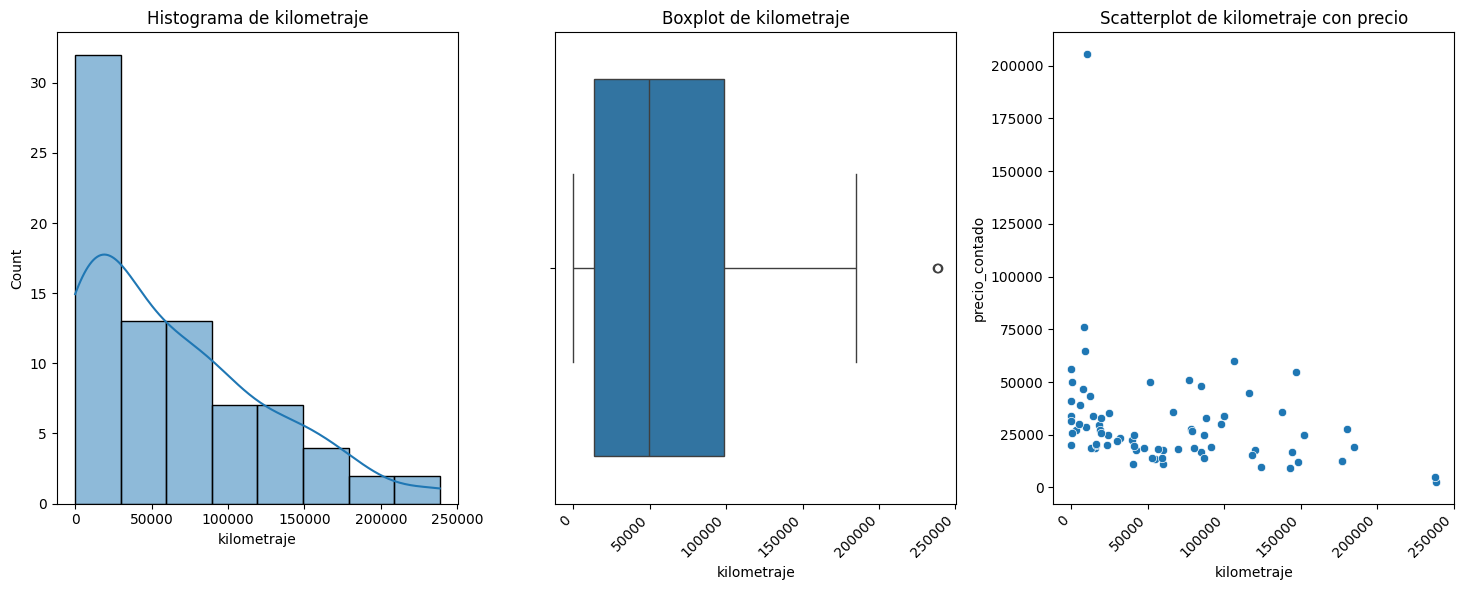

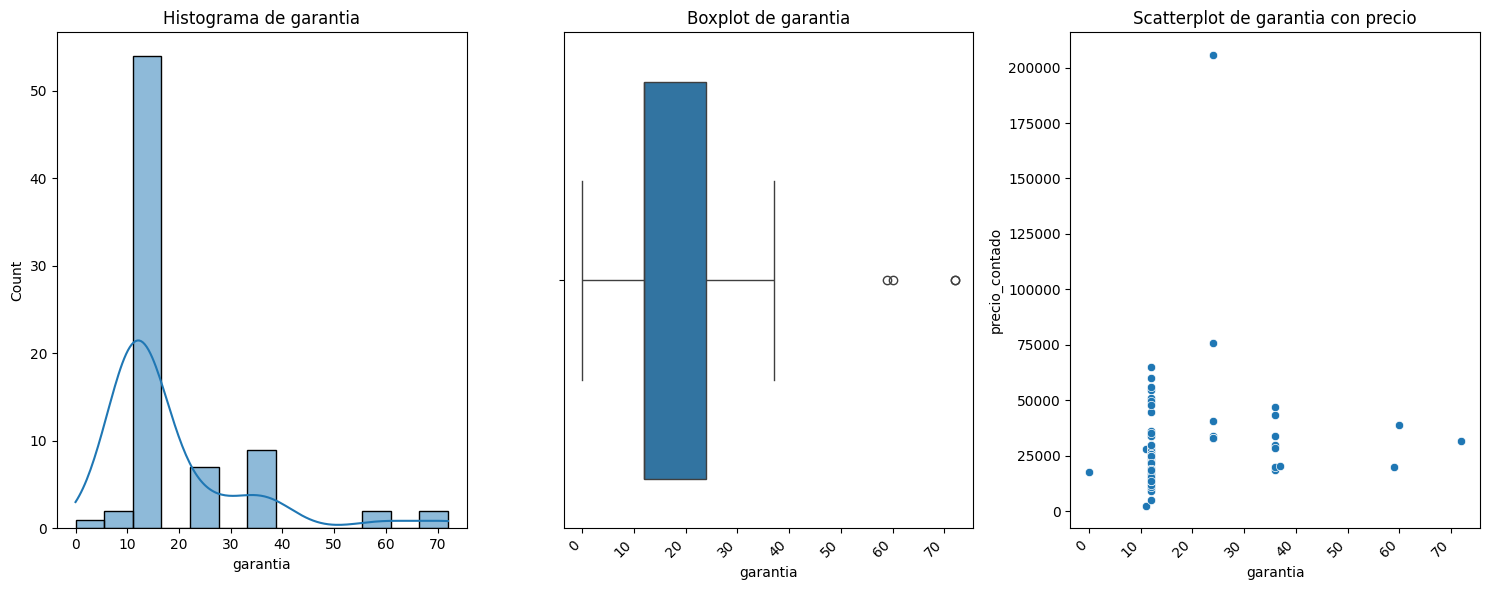

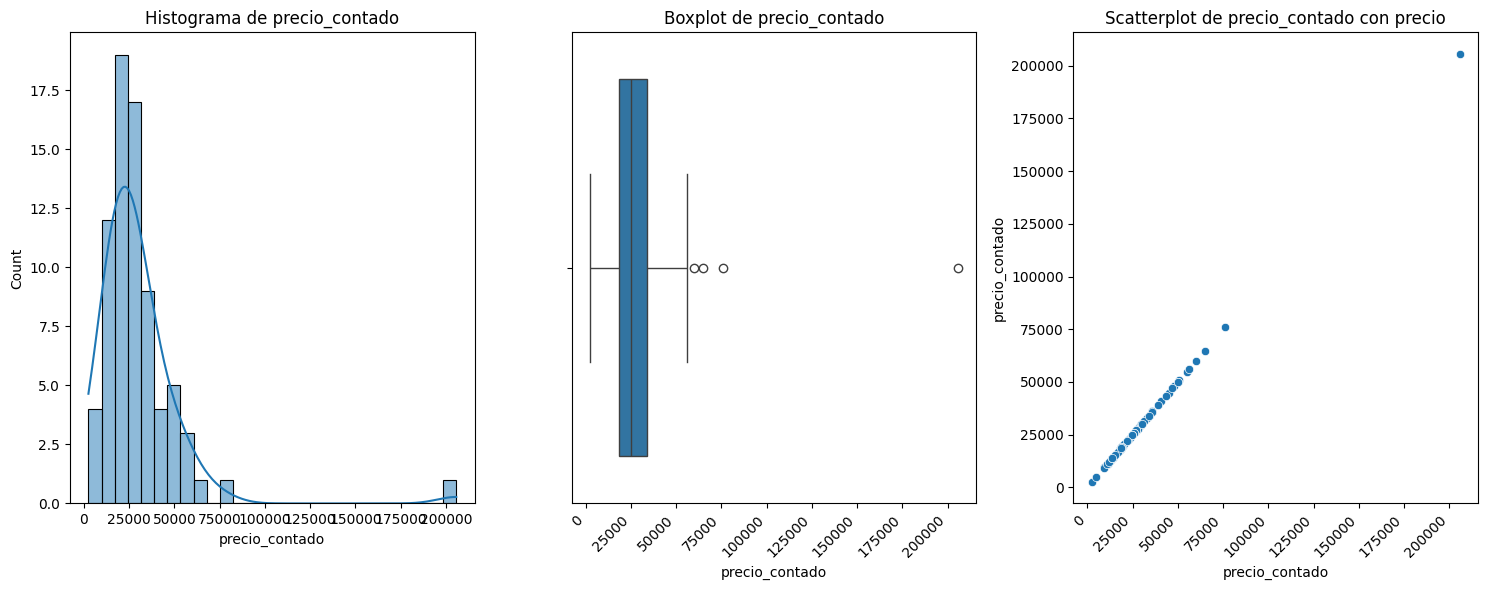

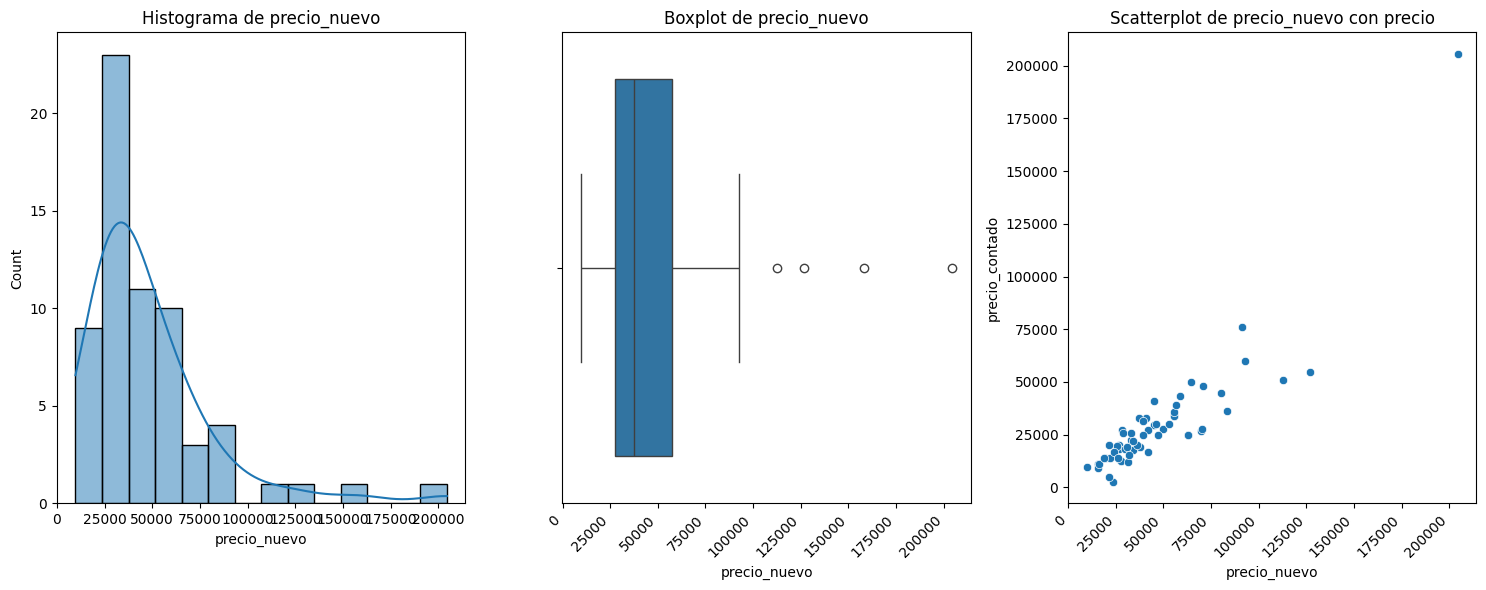

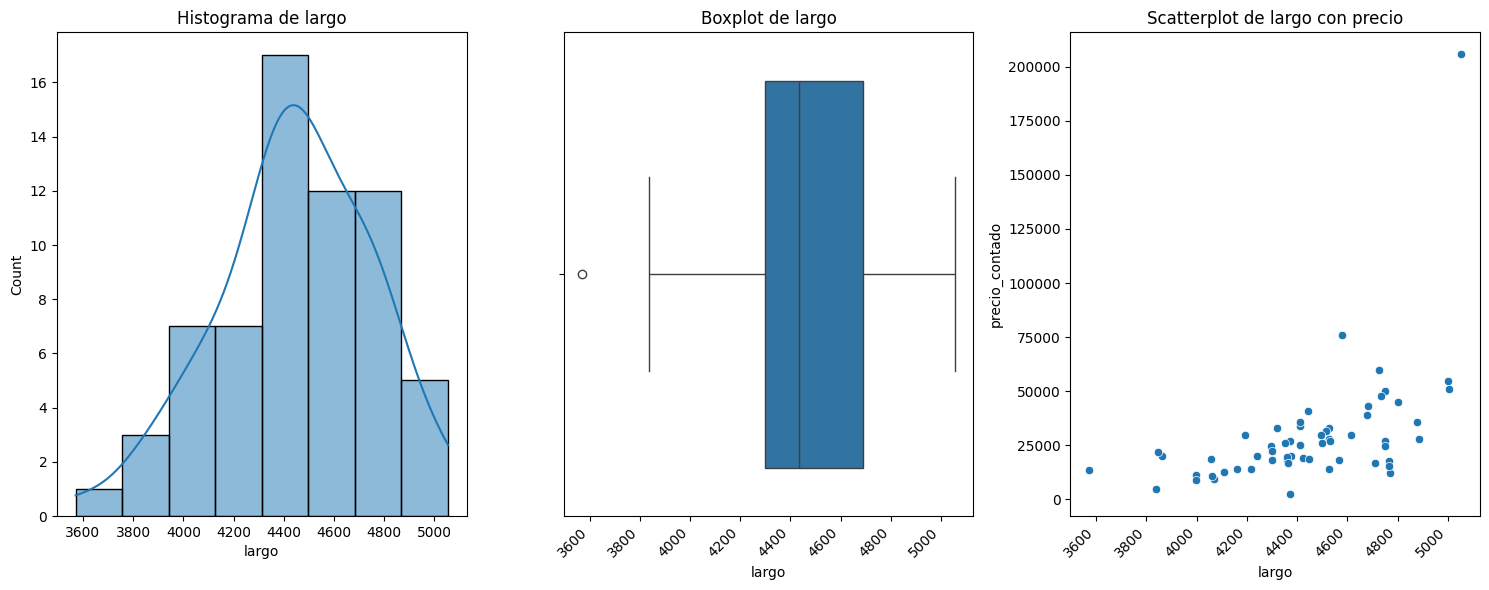

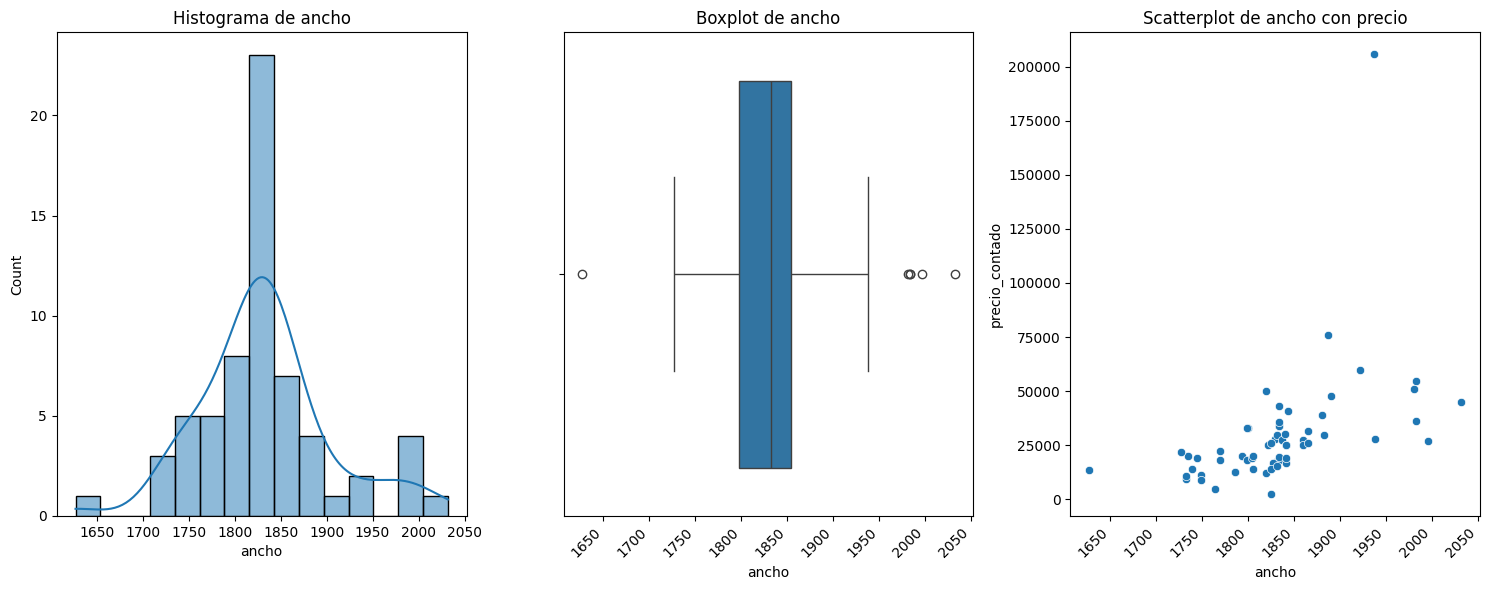

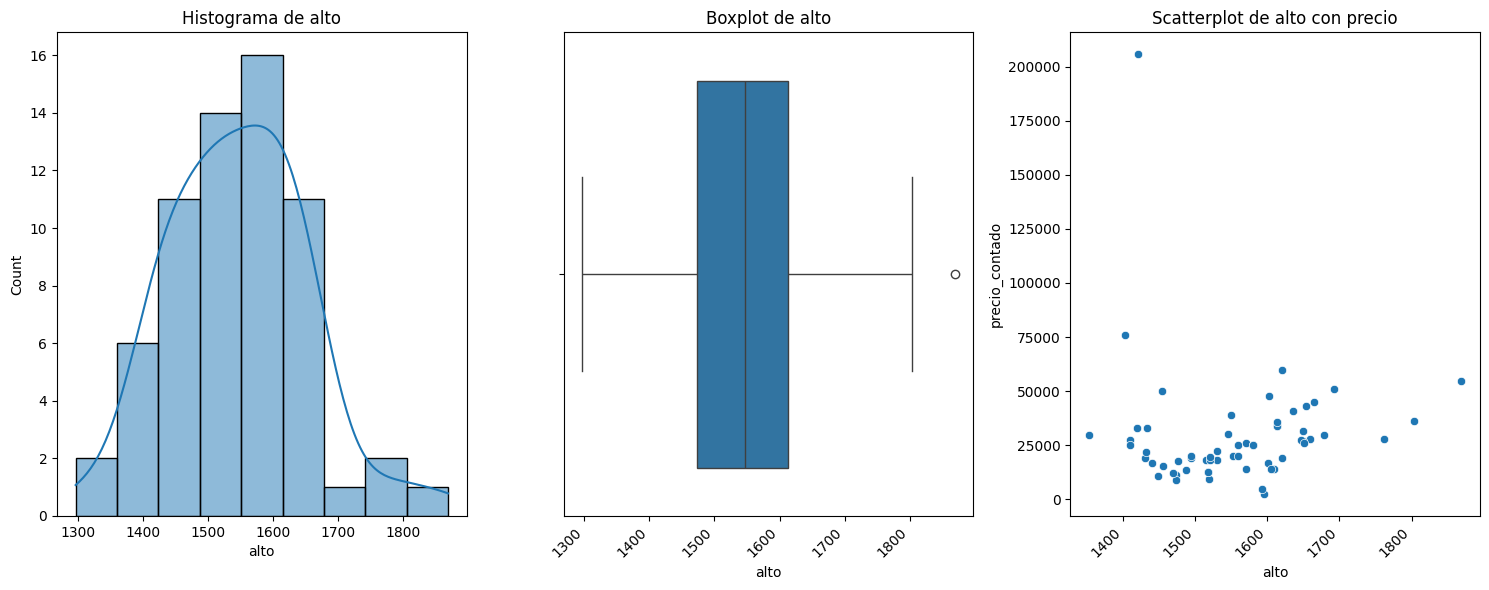

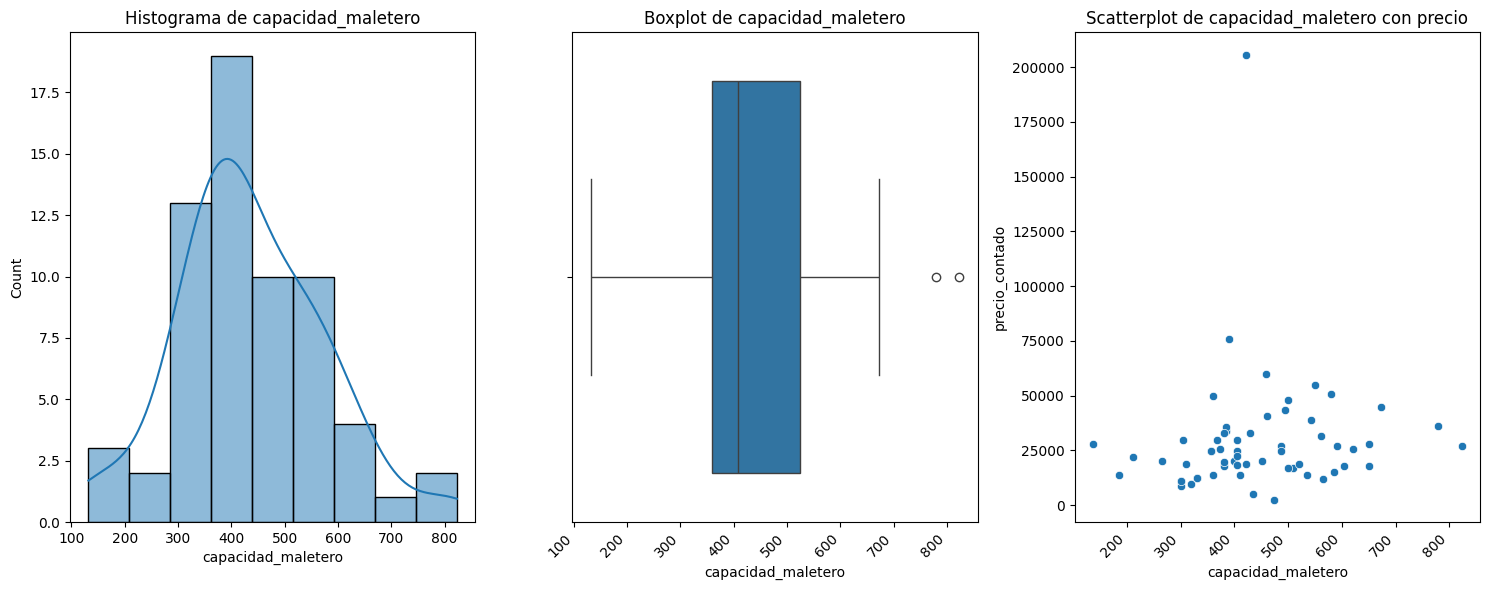

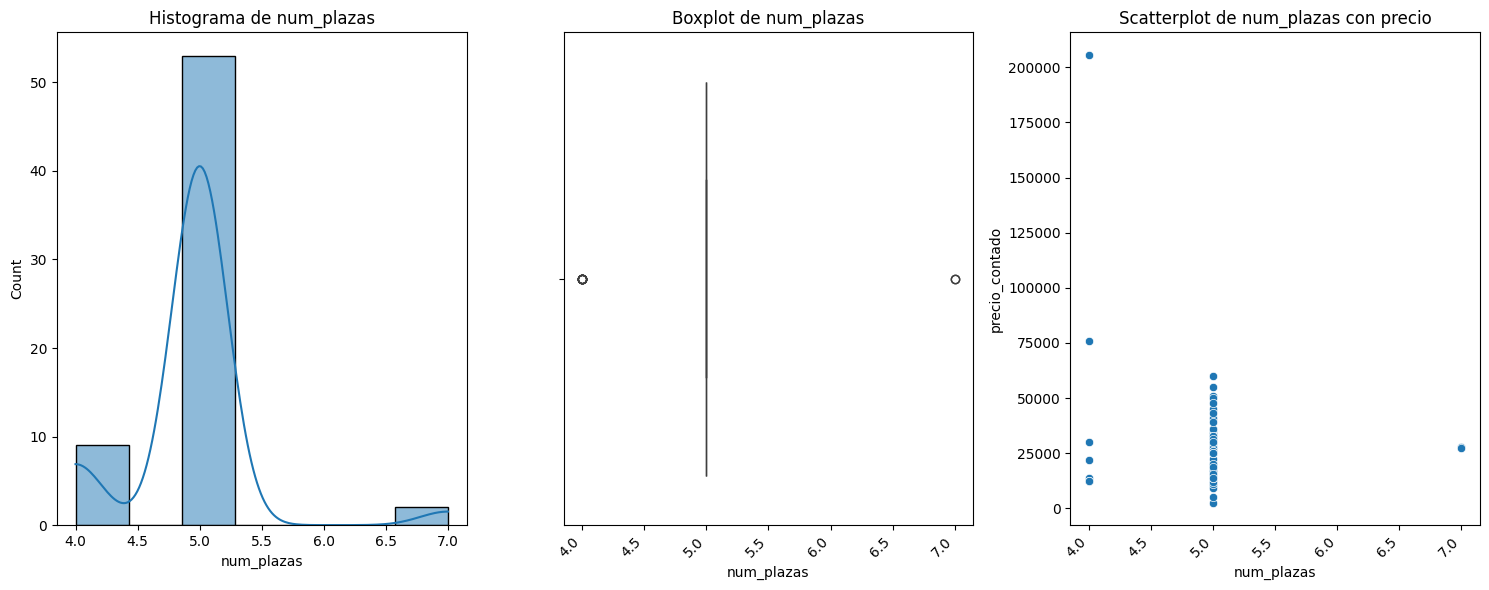

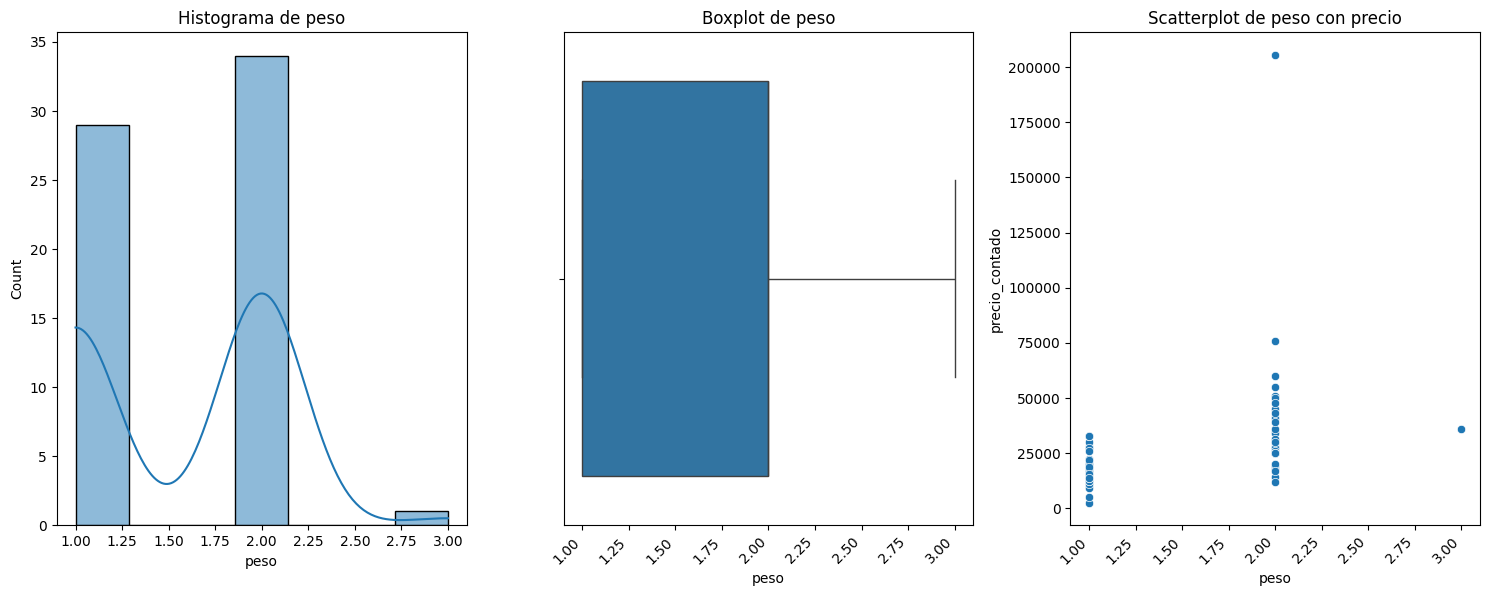

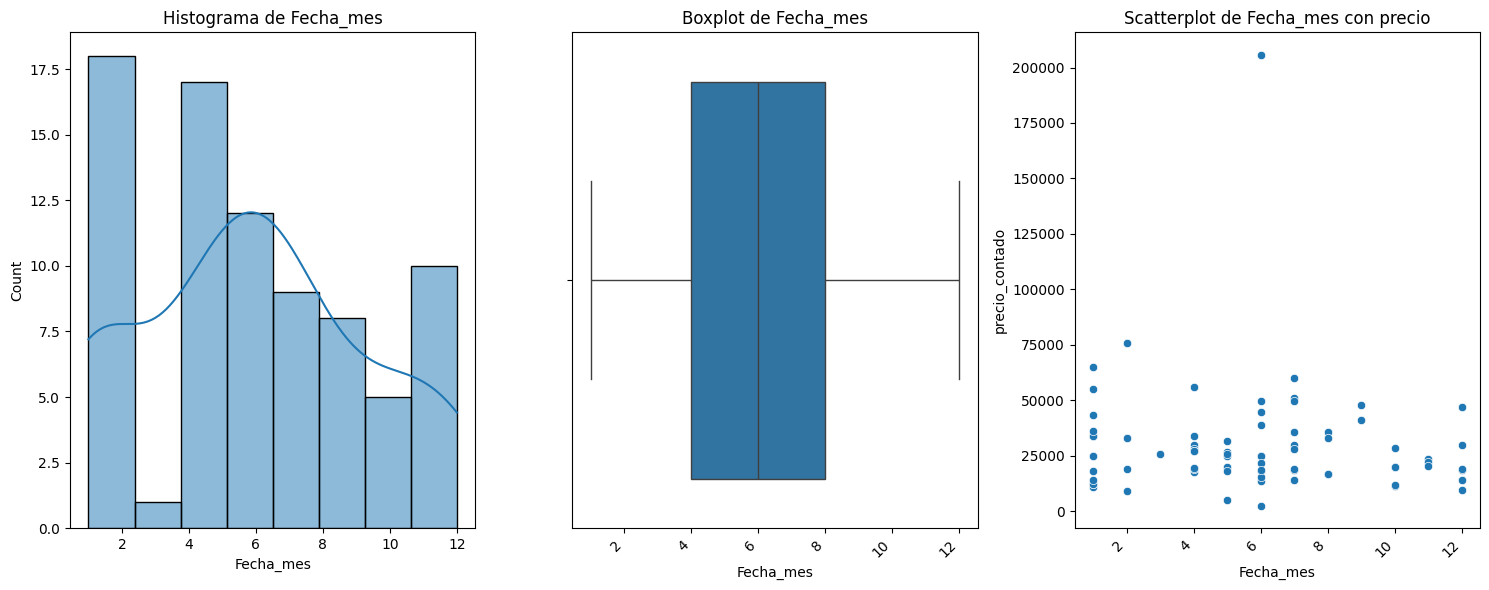

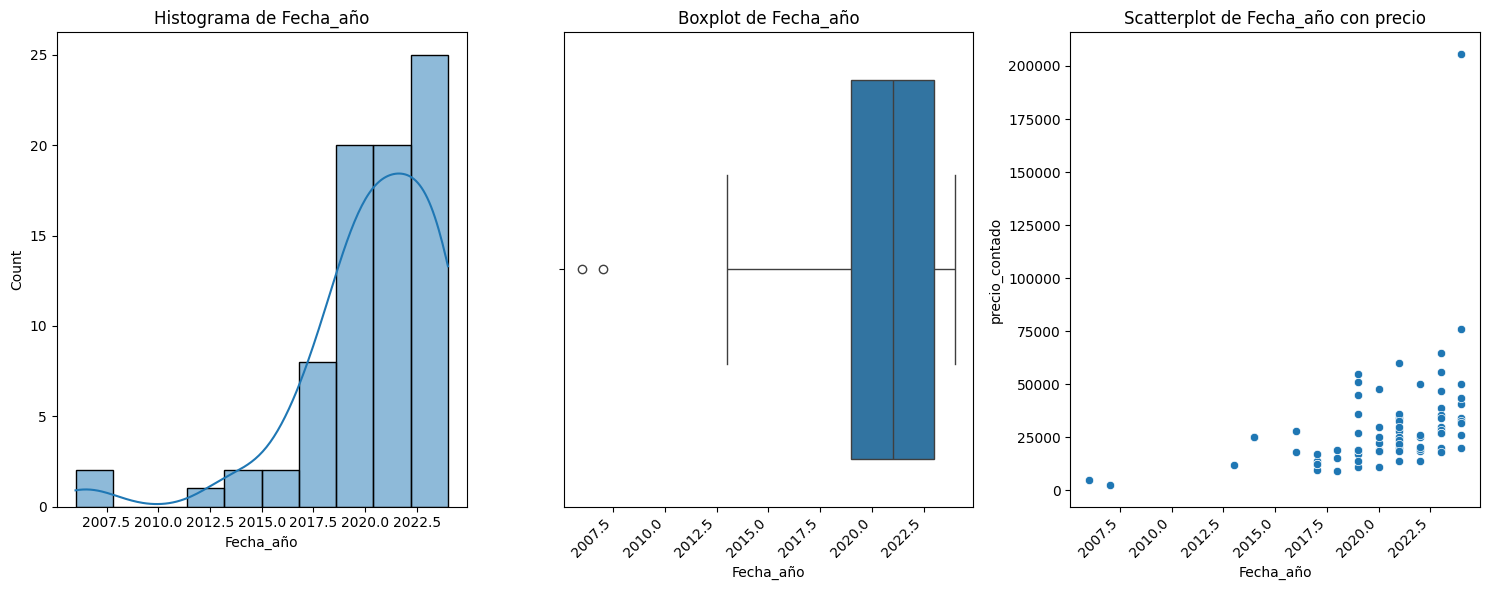

In [97]:
for columna in continuous_columns:
    metricas(df, columna)

In [ ]:
for columna in categorical_columns:
    metricas(df, columna)

In [ ]:
df.columns

In [ ]:


q1 = df["Kilómetros"].quantile(q = 0.25)
q3 = df["Kilómetros"].quantile(q = 0.75)
#k = 7
ric = q3 - q1

lim_l = q1 - 1.5*ric
lim_r = q3 + 2*ric

print(lim_l, lim_r)

print(df[df["Kilómetros"].between(lim_l, lim_r) | df["Kilómetros"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["Kilómetros"].isna()) | ((df["Kilómetros"] >= lim_l) & (df["Kilómetros"] <= lim_r))]


sns.boxplot(x = df["Kilómetros"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()


In [ ]:

q1 = df["Potencia (cv)"].quantile(q = 0.25)
q3 = df["Potencia (cv)"].quantile(q = 0.75)
#k = 7
ric = q3 - q1

lim_l = q1 - 1.5*ric
lim_r = q3 + 7*ric

print(lim_r)

print(df[df["Potencia (cv)"].between(lim_l, lim_r) | df["Potencia (cv)"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["Potencia (cv)"].isna()) | (df["Potencia (cv)"] <= lim_r)]


sns.boxplot(x = df["Potencia (cv)"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()


In [ ]:
z=3
mean = df["Garantía"].mean()
std = df["Garantía"].std()
    
lim_l = mean - z*std
lim_r = mean + z*std
    
df = df[df["Garantía"].between(lim_l, lim_r) | df["Garantía"].isna()]
porcentaje = df.shape[0] / df.shape[0] * 100
print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {"Garantía"} después de eliminar los outliers.')

In [ ]:

q1 = df["largo"].quantile(q = 0.25)
q3 = df["largo"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["largo"].between(lim_l, lim_r) | df["largo"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["largo"].isna()) | ((df["largo"] >= lim_l) & (df["largo"] <= lim_r))]


sns.boxplot(x = df["largo"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()


In [ ]:
q1 = df["ancho"].quantile(q = 0.25)
q3 = df["ancho"].quantile(q = 0.75)
k = 3
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["ancho"].between(lim_l, lim_r) | df["ancho"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["ancho"].isna()) | ((df["ancho"] >= lim_l) & (df["ancho"] <= lim_r))]


sns.boxplot(x = df["ancho"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["alto"].quantile(q = 0.25)
q3 = df["alto"].quantile(q = 0.75)
k = 2
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["alto"].between(lim_l, lim_r) | df["alto"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["alto"].isna()) | ((df["alto"] >= lim_l) & (df["alto"] <= lim_r))]


sns.boxplot(x = df["alto"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["batalla_mm"].quantile(q = 0.25)
q3 = df["batalla_mm"].quantile(q = 0.75)
k = 3
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["batalla_mm"].between(lim_l, lim_r) | df["batalla_mm"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["batalla_mm"].isna()) | ((df["batalla_mm"] >= lim_l) & (df["batalla_mm"] <= lim_r))]


sns.boxplot(x = df["batalla_mm"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["peso_masa_kg"].quantile(q = 0.25)
q3 = df["peso_masa_kg"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["peso_masa_kg"].between(lim_l, lim_r) | df["peso_masa_kg"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["peso_masa_kg"].isna()) | ((df["peso_masa_kg"] >= lim_l) & (df["peso_masa_kg"] <= lim_r))]


sns.boxplot(x = df["peso_masa_kg"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
z=3
mean = df["puertas"].mean()
std = df["puertas"].std()
    
lim_l = mean - z*std
lim_r = mean + z*std
    
df = df[df["puertas"].between(lim_l, lim_r) | df["puertas"].isna()]
porcentaje = df.shape[0] / df.shape[0] * 100
print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {"plazas"} después de eliminar los outliers.')

In [ ]:
z=3
mean = df["plazas"].mean()
std = df["plazas"].std()
    
lim_l = mean - z*std
lim_r = mean + z*std
    
df = df[df["plazas"].between(lim_l, lim_r) | df["puertas"].isna()]
porcentaje = df.shape[0] / df.shape[0] * 100
print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {"plazas"} después de eliminar los outliers.')

In [ ]:
q1 = df["urbano"].quantile(q = 0.25)
q3 = df["urbano"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + 2.5*ric

print(lim_l, lim_r)

print(df[df["urbano"].between(lim_l, lim_r) | df["urbano"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["urbano"].isna()) | (df["urbano"] <= lim_r)]


sns.boxplot(x = df["urbano"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["carretera"].quantile(q = 0.25)
q3 = df["carretera"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + 1.5*ric

print(lim_l, lim_r)

print(df[df["carretera"].between(lim_l, lim_r) | df["carretera"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["carretera"].isna()) | (df["carretera"] <= lim_r)]


sns.boxplot(x = df["carretera"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["medio"].quantile(q = 0.25)
q3 = df["medio"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + 2.5*ric

print(lim_l, lim_r)

print(df[df["medio"].between(lim_l, lim_r) | df["medio"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["medio"].isna()) | (df["medio"] <= lim_r)]


sns.boxplot(x = df["medio"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["co2"].quantile(q = 0.25)
q3 = df["co2"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + 5*ric

print(lim_l, lim_r)

print(df[df["co2"].between(lim_l, lim_r) | df["co2"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["co2"].isna()) | (df["co2"] <= lim_r)]


sns.boxplot(x = df["co2"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["deposito"].quantile(q = 0.25)
q3 = df["deposito"].quantile(q = 0.75)
k = 3
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["deposito"].between(lim_l, lim_r) | df["deposito"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["deposito"].isna()) | ((df["deposito"] >= lim_l) & (df["deposito"] <= lim_r))]


sns.boxplot(x = df["deposito"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["Fecha_año"].quantile(q = 0.25)
q3 = df["Fecha_año"].quantile(q = 0.75)
k = 3
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["Fecha_año"].between(lim_l, lim_r) | df["Fecha_año"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["Fecha_año"].isna()) | ((df["Fecha_año"] >= lim_l))]


sns.boxplot(x = df["Fecha_año"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["maletero_1"].quantile(q = 0.25)
q3 = df["maletero_1"].quantile(q = 0.75)
k = 2
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["maletero_1"].between(lim_l, lim_r) | df["maletero_1"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["maletero_1"].isna()) | ((df["maletero_1"] >= lim_l) & (df["maletero_1"] <= lim_r))]


sns.boxplot(x = df["maletero_1"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
df.shape 

#Motivo de preocupación, imagino

In [ ]:
cambio_encoder = LabelEncoder()

df['Cambio'] = cambio_encoder.fit_transform(df['Cambio'].values)

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

for columna in categorical_columns:
    if columna != "Cambio":
        
        encoded = encoder.fit_transform(df[[columna]])
        
        encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([columna]), index=df.index)
        
        df = df.drop(columna, axis=1)
        df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df.columns

In [ ]:
categorical_columns = df.columns.difference(continuous_columns)

In [ ]:
print(df.isna().sum())

In [ ]:
columnas_imputer = columnas_imputer = ['Potencia (cv)', 'Garantía', 'largo', 'ancho', 'alto','batalla_mm', 'peso_masa_kg', 'puertas', 'plazas', 'cilindrada_cm3','cilindros', 'urbano', 'carretera', 'medio', 'co2', 'deposito', 'precio', 'Fecha_mes', 'maletero_1', 'maletero_2']


imputer = KNNImputer(n_neighbors=10)

imputer.set_output(transform="pandas")

df[columnas_imputer] = imputer.fit_transform(df[columnas_imputer])

In [ ]:
print(df.isna().sum())

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(25, 15))

sns.heatmap(correlation_matrix, annot=True)

plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [ ]:
correlations = df.corr()['precio'].sort_values(ascending=False)

print(correlations)

plt.figure(figsize=(15, 10))
sns.barplot(x=correlations.values, y=correlations.index)
plt.show()

In [ ]:
print(df.isna().sum())

In [ ]:
df = df.dropna(subset=['precio'])

In [ ]:
print(df.isna().sum())

In [ ]:
print(df['precio'].isna().sum())

In [ ]:
X = df.drop("precio", axis = 1)
y = df["precio"]

print(f"X: {X.shape}")
print(f"y: {y.shape}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Modelo de RandomForest para obtener Feature Importance
model = RandomForestRegressor(n_estimators = 250,
                               random_state = 0)
# Entrenamos el modelo
model.fit(X, y)

# Calculamos Feature Importance
importances = model.feature_importances_

df_importances = pd.DataFrame(data = zip(X.columns, importances),
                              columns = ["Columnas", "Importancia"])

df_importances = df_importances.sort_values("Importancia", ascending = False)

print("Feature Importance:")

for index, (feature, importance) in enumerate(df_importances.values):
    
    print(f"{index + 1:2}. feature {index:2} ({importance:20}): {feature}")

plt.figure(figsize = (12, 8))

plt.title("Feature Importances")
sns.barplot(x = df_importances["Importancia"], y = df_importances["Columnas"], color = "red")

plt.grid()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv("autocasion.csv")

df.head()

In [ ]:
df.shape

In [ ]:
nan_percentage = df.isna().mean()*100
print(nan_percentage)

In [ ]:
df = df.dropna(subset=['precio'])

In [ ]:
nan_percentage = df.isna().mean()*100
print(nan_percentage)

In [ ]:
df.shape

In [ ]:
df["Fecha_mes"] = np.nan

df["Fecha_año"] = df['Fecha de matriculación']

filas_con_mes = df['Fecha de matriculación'].str.contains('/')

df.loc[filas_con_mes, "Fecha_mes"] = df.loc[filas_con_mes, 'Fecha de matriculación'].str.split('/').str[0].astype("Int64")
df.loc[filas_con_mes, "Fecha_año"] = df.loc[filas_con_mes, 'Fecha de matriculación'].str.split('/').str[1].astype("Int64")

In [ ]:
#df = df.drop(columns=['Fecha de matriculación'])

In [ ]:
#La columna del año me sale tipo objeto y luego la trata como categórica
#La vuelvo a cambiar con errors="coerce" para asegurarme de que se convierte a entero

df['Fecha_año'] = pd.to_numeric(df['Fecha_año'], errors="coerce")

df['Fecha_año'].dtype

In [ ]:
df.shape

In [ ]:
df["Kilómetros"] = df["Kilómetros"].str.split(' ').str[0].str.replace(".","")

df["Kilómetros"] = df["Kilómetros"].astype(float)

In [ ]:
df["Potencia (cv)"] = df["Potencia (cv)"].replace("-",np.nan).astype(float)


In [ ]:
df["Garantía"] = df["Garantía"].str.split(' ').str[0].replace("Sí",np.nan).replace("No",0).astype(float)

In [ ]:
df = df.drop(columns=['Color'])

In [ ]:
df.shape

In [ ]:
df["largo"] = df["largo"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [ ]:
df["ancho"] = df["ancho"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [ ]:
df["alto"] = df["alto"].str.split(' ').str[0].replace("-", np.nan).astype(float)

In [ ]:
df.rename(columns={"maletero_l": "Maletero"}, inplace=True)    

df["maletero_1"]=df["Maletero"].str.split('/').str[0].astype(float)

df["maletero_2"]=df["Maletero"].str.split('/').str[1].astype(float)

In [ ]:
df = df.drop(columns=['Maletero'])

In [ ]:
df["puertas"] = df["puertas"].replace("-","").replace("", np.nan).astype(float)

In [ ]:
df["sobrealimentacion"] = df["sobrealimentacion"].replace("-",np.nan)

In [ ]:
df["urbano"] = df["urbano"].str.replace(",", ".").astype(float)

In [ ]:
df["carretera"] = df["carretera"].str.replace(",", ".").astype(float)

In [ ]:
df["medio"] = df["medio"].str.replace(",", ".").astype(float)

In [ ]:
df["co2"] = df["co2"].replace("-", 0).astype(float)

In [ ]:
df["deposito"] = df["deposito"].str.replace(",", ".").astype(float)

In [ ]:
df["precio"] = df["precio"].str.split(' ').str[0].str.replace(".", "").replace("Consultar", np.nan).astype(float)

In [ ]:
df.shape

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
continuous_columns = df.select_dtypes(include=['Int64', 'float', 'int']).columns


def metricas (df, columna):
    
    if columna in categorical_columns:
        
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 2, 1)
        sns.countplot(data=df, x=columna)
        plt.title(f'Distribución de {columna}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x=columna, y='precio')
        plt.title(f'Boxplot de {columna} con precio')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')
        plt.show()
    
    elif columna in continuous_columns:

        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 3, 1)
        sns.histplot(df[columna], kde=True)
        plt.title(f'Histograma de {columna}')
        
        
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[columna])
        plt.title(f'Boxplot de {columna}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 3, 3)
        sns.scatterplot(x=df[columna], y=df['precio'])
        plt.title(f'Scatterplot de {columna} con precio')
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')
        plt.show()

In [ ]:
categorical_columns

In [ ]:
len(categorical_columns)

In [ ]:
continuous_columns

In [ ]:
len(continuous_columns)

In [ ]:
for columna in continuous_columns:
    metricas(df, columna)

In [ ]:
for columna in categorical_columns:
    metricas(df, columna)

In [ ]:
df.columns

In [ ]:


q1 = df["Kilómetros"].quantile(q = 0.25)
q3 = df["Kilómetros"].quantile(q = 0.75)
#k = 7
ric = q3 - q1

lim_l = q1 - 1.5*ric
lim_r = q3 + 2*ric

print(lim_l, lim_r)

print(df[df["Kilómetros"].between(lim_l, lim_r) | df["Kilómetros"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["Kilómetros"].isna()) | ((df["Kilómetros"] >= lim_l) & (df["Kilómetros"] <= lim_r))]


sns.boxplot(x = df["Kilómetros"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()


In [ ]:

q1 = df["Potencia (cv)"].quantile(q = 0.25)
q3 = df["Potencia (cv)"].quantile(q = 0.75)
#k = 7
ric = q3 - q1

lim_l = q1 - 1.5*ric
lim_r = q3 + 7*ric

print(lim_r)

print(df[df["Potencia (cv)"].between(lim_l, lim_r) | df["Potencia (cv)"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["Potencia (cv)"].isna()) | (df["Potencia (cv)"] <= lim_r)]


sns.boxplot(x = df["Potencia (cv)"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()


In [ ]:
z=3
mean = df["Garantía"].mean()
std = df["Garantía"].std()
    
lim_l = mean - z*std
lim_r = mean + z*std
    
df = df[df["Garantía"].between(lim_l, lim_r) | df["Garantía"].isna()]
porcentaje = df.shape[0] / df.shape[0] * 100
print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {"Garantía"} después de eliminar los outliers.')

In [ ]:

q1 = df["largo"].quantile(q = 0.25)
q3 = df["largo"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["largo"].between(lim_l, lim_r) | df["largo"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["largo"].isna()) | ((df["largo"] >= lim_l) & (df["largo"] <= lim_r))]


sns.boxplot(x = df["largo"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()


In [ ]:
q1 = df["ancho"].quantile(q = 0.25)
q3 = df["ancho"].quantile(q = 0.75)
k = 3
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["ancho"].between(lim_l, lim_r) | df["ancho"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["ancho"].isna()) | ((df["ancho"] >= lim_l) & (df["ancho"] <= lim_r))]


sns.boxplot(x = df["ancho"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["alto"].quantile(q = 0.25)
q3 = df["alto"].quantile(q = 0.75)
k = 2
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["alto"].between(lim_l, lim_r) | df["alto"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["alto"].isna()) | ((df["alto"] >= lim_l) & (df["alto"] <= lim_r))]


sns.boxplot(x = df["alto"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["batalla_mm"].quantile(q = 0.25)
q3 = df["batalla_mm"].quantile(q = 0.75)
k = 3
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["batalla_mm"].between(lim_l, lim_r) | df["batalla_mm"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["batalla_mm"].isna()) | ((df["batalla_mm"] >= lim_l) & (df["batalla_mm"] <= lim_r))]


sns.boxplot(x = df["batalla_mm"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["peso_masa_kg"].quantile(q = 0.25)
q3 = df["peso_masa_kg"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["peso_masa_kg"].between(lim_l, lim_r) | df["peso_masa_kg"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["peso_masa_kg"].isna()) | ((df["peso_masa_kg"] >= lim_l) & (df["peso_masa_kg"] <= lim_r))]


sns.boxplot(x = df["peso_masa_kg"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
z=3
mean = df["puertas"].mean()
std = df["puertas"].std()
    
lim_l = mean - z*std
lim_r = mean + z*std
    
df = df[df["puertas"].between(lim_l, lim_r) | df["puertas"].isna()]
porcentaje = df.shape[0] / df.shape[0] * 100
print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {"plazas"} después de eliminar los outliers.')

In [ ]:
z=3
mean = df["plazas"].mean()
std = df["plazas"].std()
    
lim_l = mean - z*std
lim_r = mean + z*std
    
df = df[df["plazas"].between(lim_l, lim_r) | df["puertas"].isna()]
porcentaje = df.shape[0] / df.shape[0] * 100
print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {"plazas"} después de eliminar los outliers.')

In [ ]:
q1 = df["urbano"].quantile(q = 0.25)
q3 = df["urbano"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + 2.5*ric

print(lim_l, lim_r)

print(df[df["urbano"].between(lim_l, lim_r) | df["urbano"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["urbano"].isna()) | (df["urbano"] <= lim_r)]


sns.boxplot(x = df["urbano"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["carretera"].quantile(q = 0.25)
q3 = df["carretera"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + 1.5*ric

print(lim_l, lim_r)

print(df[df["carretera"].between(lim_l, lim_r) | df["carretera"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["carretera"].isna()) | (df["carretera"] <= lim_r)]


sns.boxplot(x = df["carretera"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["medio"].quantile(q = 0.25)
q3 = df["medio"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + 2.5*ric

print(lim_l, lim_r)

print(df[df["medio"].between(lim_l, lim_r) | df["medio"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["medio"].isna()) | (df["medio"] <= lim_r)]


sns.boxplot(x = df["medio"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["co2"].quantile(q = 0.25)
q3 = df["co2"].quantile(q = 0.75)
k = 2.5
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + 5*ric

print(lim_l, lim_r)

print(df[df["co2"].between(lim_l, lim_r) | df["co2"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["co2"].isna()) | (df["co2"] <= lim_r)]


sns.boxplot(x = df["co2"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["deposito"].quantile(q = 0.25)
q3 = df["deposito"].quantile(q = 0.75)
k = 3
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["deposito"].between(lim_l, lim_r) | df["deposito"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["deposito"].isna()) | ((df["deposito"] >= lim_l) & (df["deposito"] <= lim_r))]


sns.boxplot(x = df["deposito"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["Fecha_año"].quantile(q = 0.25)
q3 = df["Fecha_año"].quantile(q = 0.75)
k = 3
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["Fecha_año"].between(lim_l, lim_r) | df["Fecha_año"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["Fecha_año"].isna()) | ((df["Fecha_año"] >= lim_l))]


sns.boxplot(x = df["Fecha_año"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
q1 = df["maletero_1"].quantile(q = 0.25)
q3 = df["maletero_1"].quantile(q = 0.75)
k = 2
ric = q3 - q1

lim_l = q1 - k*ric
lim_r = q3 + k*ric

print(lim_l, lim_r)

print(df[df["maletero_1"].between(lim_l, lim_r) | df["maletero_1"].isna()].shape[0]/df.shape[0]*100)
    
df = df[(df["maletero_1"].isna()) | ((df["maletero_1"] >= lim_l) & (df["maletero_1"] <= lim_r))]


sns.boxplot(x = df["maletero_1"])
plt.axvline(lim_l)
plt.axvline(lim_r)
plt.show()

In [ ]:
df.shape 

#Motivo de preocupación, imagino

In [ ]:
cambio_encoder = LabelEncoder()

df['Cambio'] = cambio_encoder.fit_transform(df['Cambio'].values)

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

for columna in categorical_columns:
    if columna != "Cambio":
        
        encoded = encoder.fit_transform(df[[columna]])
        
        encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([columna]), index=df.index)
        
        df = df.drop(columna, axis=1)
        df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df.columns

In [ ]:
categorical_columns = df.columns.difference(continuous_columns)

In [ ]:
print(df.isna().sum())

In [ ]:
columnas_imputer = columnas_imputer = ['Potencia (cv)', 'Garantía', 'largo', 'ancho', 'alto','batalla_mm', 'peso_masa_kg', 'puertas', 'plazas', 'cilindrada_cm3','cilindros', 'urbano', 'carretera', 'medio', 'co2', 'deposito', 'precio', 'Fecha_mes', 'maletero_1', 'maletero_2']


imputer = KNNImputer(n_neighbors=10)

imputer.set_output(transform="pandas")

df[columnas_imputer] = imputer.fit_transform(df[columnas_imputer])

In [ ]:
print(df.isna().sum())

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(25, 15))

sns.heatmap(correlation_matrix, annot=True)

plt.title('Mapa de Calor de Correlaciones')
plt.show()

In [ ]:
correlations = df.corr()['precio'].sort_values(ascending=False)

print(correlations)

plt.figure(figsize=(15, 10))
sns.barplot(x=correlations.values, y=correlations.index)
plt.show()

In [ ]:
print(df.isna().sum())

In [ ]:
df = df.dropna(subset=['precio'])

In [ ]:
print(df.isna().sum())

In [ ]:
print(df['precio'].isna().sum())

In [ ]:
X = df.drop("precio", axis = 1)
y = df["precio"]

print(f"X: {X.shape}")
print(f"y: {y.shape}")

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Modelo de RandomForest para obtener Feature Importance
model = RandomForestRegressor(n_estimators = 250,
                               random_state = 0)
# Entrenamos el modelo
model.fit(X, y)

# Calculamos Feature Importance
importances = model.feature_importances_

df_importances = pd.DataFrame(data = zip(X.columns, importances),
                              columns = ["Columnas", "Importancia"])

df_importances = df_importances.sort_values("Importancia", ascending = False)

print("Feature Importance:")

for index, (feature, importance) in enumerate(df_importances.values):
    
    print(f"{index + 1:2}. feature {index:2} ({importance:20}): {feature}")

plt.figure(figsize = (12, 8))

plt.title("Feature Importances")
sns.barplot(x = df_importances["Importancia"], y = df_importances["Columnas"], color = "red")

plt.grid()
plt.show()